In [6]:
# 0 - Primero instalo pandas
!pip install pandas

In [1]:
# 0 - Cargo las librerías que necesito para el ejercicio de ML

#from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%matplotlib inline 

In [2]:
# 0 - También cargo la librería sklearn 
import sklearn
sklearn.__version__

'1.5.1'

In [4]:
# 1 - Ahora empezamos la preparación de datos y la división de train / test
# 1.1 - Cargamos el dataset de airbnb

airbnb = pd.read_csv("airbnb-listings-extract.csv", sep=";")
airbnb.head(4)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."


In [6]:
# 1.2 - A continuación se eliminan las columnas no relevantes para el estudio (IDs, URLs, etc). Primero listo las cabeceras para saber qué columnas eliminar

print(airbnb.columns)



Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [9]:
# 1.2 Eliminación de las columnas. Primero he hecho un intento eliminando unas cuantas, pero después he hecho una segunda vuelta con el siguiente resultado: Me quedo con 26 características

airbnb = airbnb.drop(['ID','Listing Url','Scrape ID','Last Scraped','Space','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host About','Host Thumbnail Url','Host Picture Url','Host Verifications','Market','Smart Location','Country Code','Weekly Price','Monthly Price','Maximum Nights','Calendar Updated','Has Availability','First Review','Last Review','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Value','License','Jurisdiction Names','Name','Summary','Experiences Offered','Host Since','Host Location','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Neighbourhood','Host Listings Count','Host Total Listings Count','Neighbourhood Cleansed','Neighbourhood Group Cleansed','State','Latitude','Longitude','Calendar last Scraped','Geolocation','Features','Calculated host listings count'], axis=1)
airbnb.head(5).T

,0,1,2,3,4
Street,"Canyon Edge Drive, Austin, TX 78733, United St...","Barcelona, Barcelona 08010, Spain","Barcelona, Barcelona 08008, Spain","Barcelona, Barcelona 08009, Spain","L'Antiga Esquerra de l'Eixample, Barcelona, Ca..."
Neighbourhood,NaN,NaN,NaN,NaN,L'Antiga Esquerra de l'Eixample
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
Zipcode,78733,08010,08008,08009,08036
Country,United States,Spain,Spain,Spain,Spain
Property Type,Loft,Apartment,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,2,4,4,8,5
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,3.0,2.0


In [11]:
# 1.3 - Nos quedamos sólo con las muestras que son de Madrid

airbnb_Madrid = airbnb[airbnb['City'] == "Madrid"]

airbnb_Madrid.head(5).T
print(airbnb_Madrid.shape)


(13207, 28)


In [13]:
# 1.4 Ahora hacemos la división entre train y test

from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_Madrid, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./airbnb_Madrid_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb_Madrid_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb_Madrid_train = pd.read_csv('./airbnb_Madrid_train.csv', sep=';', decimal='.')
airbnb_Madrid_train.head(5).T

Dimensiones del dataset de training: (10565, 28)
Dimensiones del dataset de test: (2642, 28)


,0,1,2,3,4
Street,"Madrid, Community of Madrid, Spain","Madrid, Comunidad de Madrid 28017, Spain","Cortes, Madrid, Comunidad de Madrid 28014, Spain","Sol, Madrid, Comunidad de Madrid 28013, Spain","Pacifico, Madrid, Comunidad de Madrid 28007, S..."
Neighbourhood,NaN,NaN,Cortes,Sol,Pacifico
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,NaN,28017,28014,28013,28007
Country,Spain,Spain,Spain,Spain,Spain
Property Type,Apartment,House,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room
Accommodates,4,1,4,2,2
Bathrooms,1.0,1.0,1.0,1.0,2.0
Bedrooms,1.0,1.0,2.0,0.0,1.0


In [15]:
# 2 Aquí empieza el análisis exploratorio de los datos del dataset
# 2.1 - Cabeceras (head) - Después de eliminar las columnas sobrantes, quedan 26 columnas de datos (o características). 

airbnb_Madrid_train.head().T

,0,1,2,3,4
Street,"Madrid, Community of Madrid, Spain","Madrid, Comunidad de Madrid 28017, Spain","Cortes, Madrid, Comunidad de Madrid 28014, Spain","Sol, Madrid, Comunidad de Madrid 28013, Spain","Pacifico, Madrid, Comunidad de Madrid 28007, S..."
Neighbourhood,NaN,NaN,Cortes,Sol,Pacifico
City,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,NaN,28017,28014,28013,28007
Country,Spain,Spain,Spain,Spain,Spain
Property Type,Apartment,House,Apartment,Apartment,Apartment
Room Type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Private room
Accommodates,4,1,4,2,2
Bathrooms,1.0,1.0,1.0,1.0,2.0
Bedrooms,1.0,1.0,2.0,0.0,1.0


In [18]:
# 2.2 - Descripción (describe) es un método de pandas que nos muestra diferentes métricas de cada característica, que servirán para ver la relación de algunas 
# características (variables independientes) con el precio (variable dependiente).
# Parece ser que hay unos Outliers: los valores máximos de Accomodates, Bathrooms, Bedrooms, Beds, Cleaning Fee, Extra People parecen Outliers

airbnb_Madrid_train.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Reviews per Month
count,10565.000000,10523.000000,10545.000000,10522.000000,427.000000,10558.000000,4479.000000,6256.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,8378.000000
mean,3.182773,1.253587,1.293789,1.981753,374.084309,65.771832,182.905336,29.535166,1.568102,7.403691,3.014576,8.741978,22.928064,40.119072,204.721912,22.973213,1.934709
std,1.986991,0.603839,0.832743,1.509860,520.539060,56.347456,107.433671,25.960698,1.080018,11.145815,13.923215,9.084841,19.510154,29.365182,127.258563,38.299584,1.905633
min,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,70.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,31.000000,100.000000,15.000000,1.000000,0.000000,1.000000,0.000000,5.000000,12.000000,83.000000,1.000000,0.480000
50%,2.000000,1.000000,1.000000,1.000000,108.000000,52.000000,150.000000,25.000000,1.000000,0.000000,2.000000,6.000000,20.000000,38.000000,245.000000,7.000000,1.280000
75%,4.000000,1.000000,2.000000,2.000000,646.000000,80.000000,200.000000,35.000000,2.000000,14.000000,3.000000,14.000000,38.000000,65.000000,321.000000,28.000000,2.900000
max,16.000000,8.000000,10.000000,16.000000,2691.000000,875.000000,990.000000,500.000000,16.000000,276.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,446.000000,17.210000


In [17]:
# 2.3 - Tipos de datos (dtypes)

airbnb_Madrid_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Street                  10565 non-null  object 
 1   Neighbourhood           6998 non-null   object 
 2   City                    10565 non-null  object 
 3   Zipcode                 10215 non-null  object 
 4   Country                 10565 non-null  object 
 5   Property Type           10565 non-null  object 
 6   Room Type               10565 non-null  object 
 7   Accommodates            10565 non-null  int64  
 8   Bathrooms               10523 non-null  float64
 9   Bedrooms                10545 non-null  float64
 10  Beds                    10522 non-null  float64
 11  Bed Type                10565 non-null  object 
 12  Amenities               10483 non-null  object 
 13  Square Feet             427 non-null    float64
 14  Price                   10558 non-null

In [19]:
# Conversión de square feet en square meters

def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

airbnb_Madrid_train['Square Meters'] = sqft_to_m2(airbnb_Madrid_train['Square Feet'])




In [21]:
# 2.4 - Is null.any devuelve si para cada característica hay algún null

airbnb_Madrid_train.isnull().any()


Street                    False
Neighbourhood              True
City                      False
Zipcode                    True
Country                   False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Bed Type                  False
Amenities                  True
Square Feet                True
Price                      True
Security Deposit           True
Cleaning Fee               True
Guests Included           False
Extra People              False
Minimum Nights            False
Availability 30           False
Availability 60           False
Availability 90           False
Availability 365          False
Number of Reviews         False
Review Scores Location     True
Cancellation Policy       False
Reviews per Month          True
Square Meters              True
dtype: bool

In [23]:
# 2.5 - Solucionar los True de isnull sustituyendo por '0', o la media o la moda, según el caso

airbnb_Madrid_train['Neighbourhood'].fillna('0', inplace=True)
airbnb_Madrid_train['Zipcode'].fillna('0', inplace=True)
airbnb_Madrid_train['Bathrooms'].fillna(airbnb_Madrid_train['Bathrooms'].mode()[0], inplace=True)
airbnb_Madrid_train['Bedrooms'].fillna(airbnb_Madrid_train['Bedrooms'].mode()[0], inplace=True)
airbnb_Madrid_train['Beds'].fillna(airbnb_Madrid_train['Beds'].mode()[0], inplace=True)
airbnb_Madrid_train['Amenities'].fillna('0', inplace=True)
airbnb_Madrid_train['Square Feet'].fillna(airbnb_Madrid_train['Square Feet'].mean(), inplace=True)
airbnb_Madrid_train['Price'].fillna(airbnb_Madrid_train['Price'].mean(), inplace=True)
airbnb_Madrid_train['Security Deposit'].fillna(airbnb_Madrid_train['Security Deposit'].mode()[0], inplace=True)
airbnb_Madrid_train['Cleaning Fee'].fillna(airbnb_Madrid_train['Cleaning Fee'].mode()[0], inplace=True)
airbnb_Madrid_train['Reviews per Month'].fillna(airbnb_Madrid_train['Reviews per Month'].mode()[0], inplace=True)
airbnb_Madrid_train['Review Scores Location'].fillna('0', inplace=True)
airbnb_Madrid_train['Square Meters'].fillna(airbnb_Madrid_train['Square Meters'].mean(), inplace=True)

airbnb_Madrid_train.isnull().any()


C:\Users\usuario\AppData\Local\Temp\ipykernel_28828\974583039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_Madrid_train['Neighbourhood'].fillna('0', inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_28828\974583039.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Street                    False
Neighbourhood             False
City                      False
Zipcode                   False
Country                   False
Property Type             False
Room Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Beds                      False
Bed Type                  False
Amenities                 False
Square Feet               False
Price                     False
Security Deposit          False
Cleaning Fee              False
Guests Included           False
Extra People              False
Minimum Nights            False
Availability 30           False
Availability 60           False
Availability 90           False
Availability 365          False
Number of Reviews         False
Review Scores Location    False
Cancellation Policy       False
Reviews per Month         False
Square Meters             False
dtype: bool

In [25]:
# 2.5.1 - Añadimos algunas características nuevas al modelo, que pueden aportar relación entre características

# Quiero añadir una label al room type: 1-Entire home 2- Private room 3- Shared room

airbnb_Madrid_train['label_tipo'] = airbnb_Madrid_train['Room Type'].apply(lambda x: '1' if x == 'Entire home/apt' else ('2' if x == 'Private room' else '3' if x == 'Shared room' else '4'))
#airbnb_Madrid_train['label_tipo'].fillna('0', inplace=True)

# Añadir Review scores location, que al principio no la había contemplado

# Añadir una label a la cancelation policy, porque el precio también depende de esta característica
airbnb_Madrid_train['label_CancellationPolicy'] = airbnb_Madrid_train['Cancellation Policy'].apply(lambda x: '1' if x == 'flexible' else ('2' if x == 'flexible_new' else ('3' if x == 'moderate' else ('4' if x == 'moderate_new' else ('5' if x == 'strict' else ('6' if x == 'strict_new' else ('7' if x == 'super_strict_30' else ('8' if x == 'super_strict_60' else '9'))))))))
#airbnb_Madrid_train['label_CancellationPolicy'].fillna('0', inplace=True)

In [74]:
#2.5.2 Intento "pulir" los datos de Zipcode porque veo que hay datos que no son float, pero es muy costoso y prefiero eliminar la característica del modelo

#airbnb_Madrid_train = airbnb_Madrid_train.drop(airbnb_Madrid_train[airbnb_Madrid_train['Zipcode'] == '28051\n28051'].index)
#airbnb_Madrid_train = airbnb_Madrid_train.drop(airbnb_Madrid_train[airbnb_Madrid_train['Zipcode'] == 'Madrid 28004'].index)

#filas_nofloat = airbnb_Madrid_train[~airbnb_Madrid_train['Zipcode'].apply(lambda x: isinstance(x, float))]

#print(filas_nofloat['Zipcode'])


0            0
1        28017
2        28014
3        28013
4        28007
         ...  
10560    28008
10561    28015
10562    28005
10563    28036
10564    28035
Name: Zipcode, Length: 10563, dtype: object


In [27]:
# 2.6 - Correlación entre los datos. Primero creo otro dataframe con los datos correlacionables

airbnb_Madrid_train_corr = airbnb_Madrid_train.drop (['Street', 'Neighbourhood', 'City', 'Zipcode', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy'], axis=1)  
airbnb_Madrid_train_corr.corr()

,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Location,Reviews per Month,Square Meters,label_tipo,label_CancellationPolicy
Accommodates,1.000000,0.317546,0.675557,0.820552,0.075403,0.574567,0.242037,0.296523,0.577543,0.264841,...,-0.067163,-0.058821,-0.064222,0.077336,0.086196,0.126548,0.069036,0.075403,-0.491908,0.218838
Bathrooms,0.317546,1.000000,0.417823,0.376018,0.073941,0.342137,0.165157,0.244495,0.179413,0.081193,...,-0.019971,-0.036113,-0.036670,-0.002835,-0.059999,-0.077316,-0.065788,0.073941,0.030768,0.116596
Bedrooms,0.675557,0.417823,1.000000,0.691317,0.093023,0.519088,0.217960,0.315717,0.429154,0.140966,...,-0.025292,-0.037047,-0.047192,0.021975,-0.021171,0.027986,-0.031192,0.093023,-0.242015,0.078496
Beds,0.820552,0.376018,0.691317,1.000000,0.084097,0.487119,0.195199,0.276602,0.456668,0.203189,...,-0.004668,-0.005836,-0.014458,0.088744,0.040320,0.075027,0.008046,0.084097,-0.270153,0.144149
Square Feet,0.075403,0.073941,0.093023,0.084097,1.000000,0.055965,0.021336,0.035439,0.047668,0.038195,...,-0.001354,-0.003372,-0.007871,-0.003337,-0.033410,-0.007484,-0.013482,1.000000,-0.014811,0.012528
Price,0.574567,0.342137,0.519088,0.487119,0.055965,1.000000,0.295149,0.512853,0.363039,0.100316,...,0.017382,0.003771,-0.013104,0.071049,-0.030681,-0.026908,-0.056173,0.055965,-0.448893,0.131279
Security Deposit,0.242037,0.165157,0.217960,0.195199,0.021336,0.295149,1.000000,0.280824,0.176396,0.101287,...,-0.048975,-0.042678,-0.034791,0.052775,-0.032778,0.010663,-0.060440,0.021336,-0.240419,0.181593
Cleaning Fee,0.296523,0.244495,0.315717,0.276602,0.035439,0.512853,0.280824,1.000000,0.162155,0.058792,...,-0.008165,-0.020258,-0.030154,0.071805,-0.070784,-0.064297,-0.114265,0.035439,-0.219235,0.134647
Guests Included,0.577543,0.179413,0.429154,0.456668,0.047668,0.363039,0.176396,0.162155,1.000000,0.335939,...,-0.089187,-0.075784,-0.075845,0.053996,0.121515,0.161201,0.100254,0.047668,-0.359760,0.191797
Extra People,0.264841,0.081193,0.140966,0.203189,0.038195,0.100316,0.101287,0.058792,0.335939,1.000000,...,0.033245,0.044688,0.043612,0.089296,0.073336,0.114887,0.013187,0.038195,-0.107725,0.144955


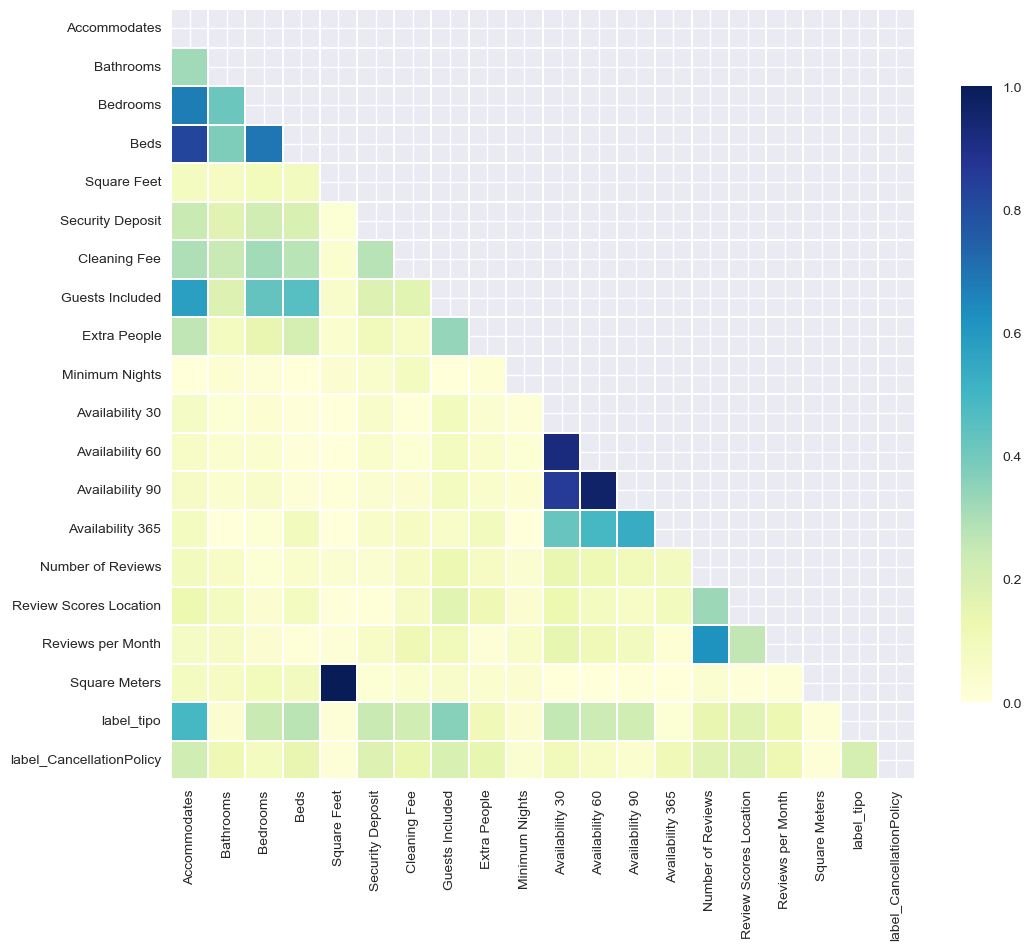

In [29]:
# 2.6.1 Representación gráfica de la correlación

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_Madrid_train_corr.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [43]:
# 2.7 - Conversión de los Square Feet en m2

#def sqft_to_m2(superficie):
#    return superficie * 0.092903

#airbnb_Madrid_train['Square Meters'] = sqft_to_m2(airbnb_Madrid_train['Square Feet'])

#airbnb_Madrid_train['Square Meters'].fillna(airbnb_Madrid_train['Square Meters'].mean(), inplace=True)

#airbnb_Madrid_train.head(4)

C:\Users\usuario\AppData\Local\Temp\ipykernel_26736\4243787473.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_Madrid_train['Square Meters'].fillna(airbnb_Madrid_train['Square Meters'].mean(), inplace=True)


,Street,Neighbourhood,City,Zipcode,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,...,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews,Reviews per Month,Square Meters
0,"Madrid, Community of Madrid, Spain",0,Madrid,0,Spain,Apartment,Entire home/apt,4,1.0,1.0,...,374.084309,55.0,100.0,30.0,1,0,1,72,7.63,34.753555
1,"Madrid, Comunidad de Madrid 28017, Spain",0,Madrid,28017,Spain,House,Private room,1,1.0,1.0,...,374.084309,21.0,100.0,30.0,1,0,1,0,1.00,34.753555
2,"Cortes, Madrid, Comunidad de Madrid 28014, Spain",Cortes,Madrid,28014,Spain,Apartment,Entire home/apt,4,1.0,2.0,...,374.084309,110.0,175.0,50.0,4,15,2,58,2.28,34.753555
3,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Madrid,28013,Spain,Apartment,Entire home/apt,2,1.0,0.0,...,374.084309,39.0,100.0,30.0,1,0,2,11,2.97,34.753555


In [ ]:
# 2.8 - Visualizaciones de los principales datos
# 2.8.1 - Histogramas de variables por separado

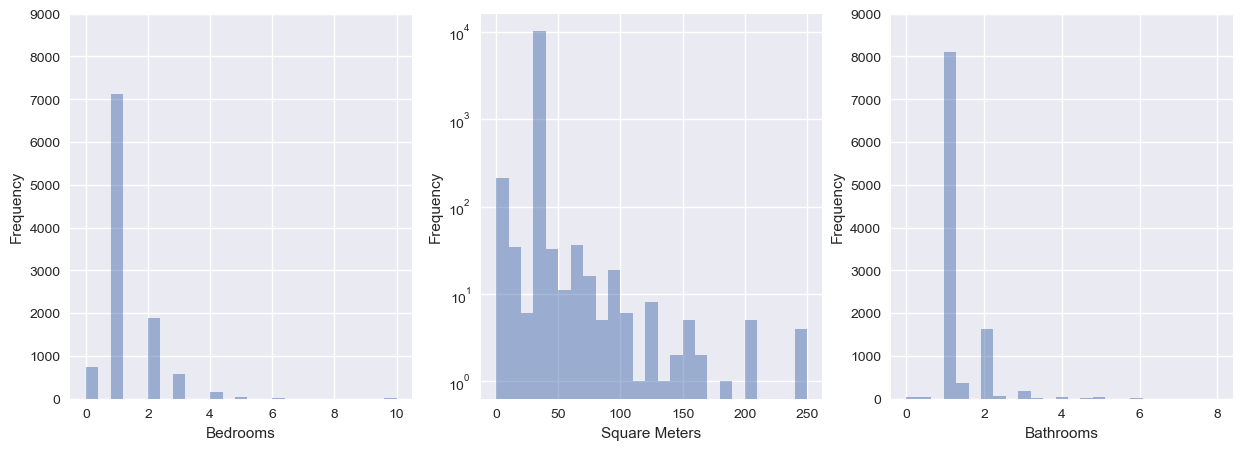

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_Madrid_train['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 9000)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
airbnb_Madrid_train['Square Meters'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Square Meters')

plt.subplot(1,3,3)
airbnb_Madrid_train['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 9000)
plt.xlabel('Bathrooms')

plt.show()

In [92]:
# Se observa que el los Square Meters hay muchos pisos con aprox 40 m2. No es así, es que muchos 
# datos se han rellenado con el valor de la media 

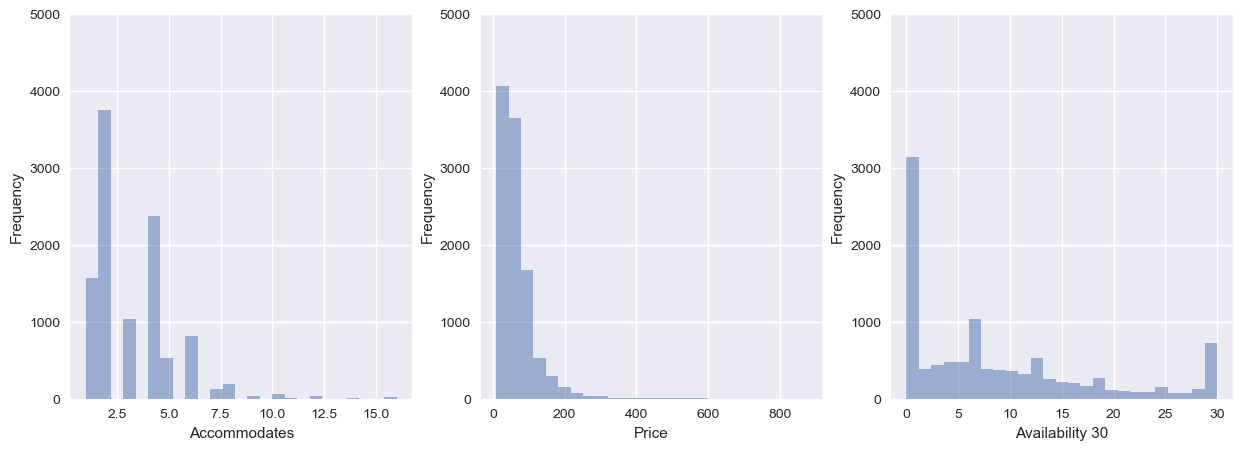

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_Madrid_train['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 5000)
plt.xlabel('Accommodates')

plt.subplot(1,3,2)
airbnb_Madrid_train['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 5000)
plt.xlabel('Price')

plt.subplot(1,3,3)
airbnb_Madrid_train['Availability 30'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.ylim(0, 5000)
plt.xlabel('Availability 30')

plt.show()

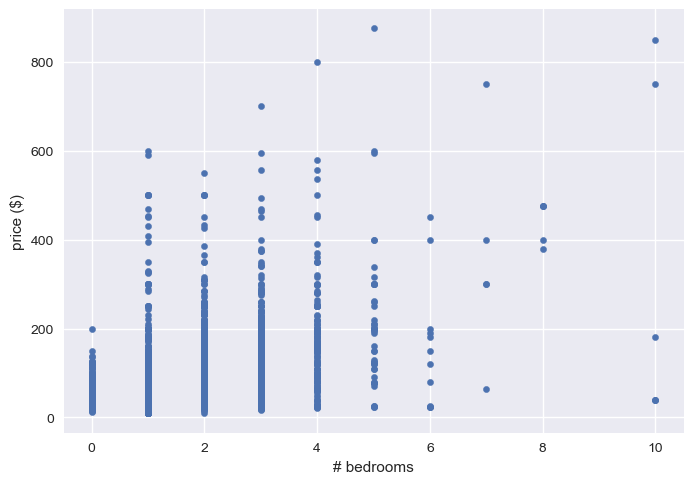

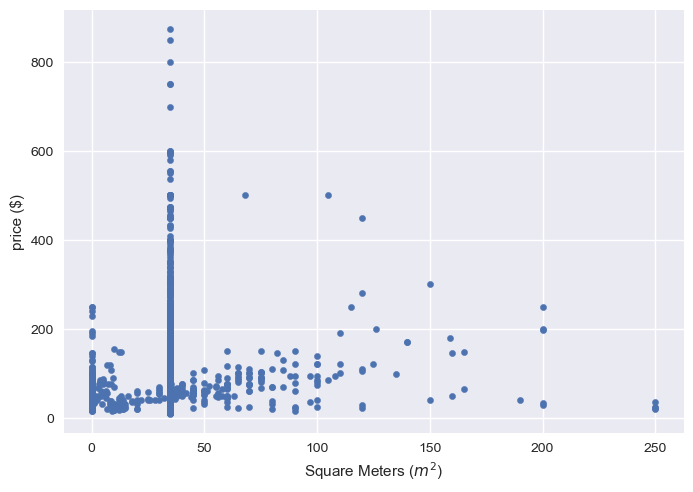

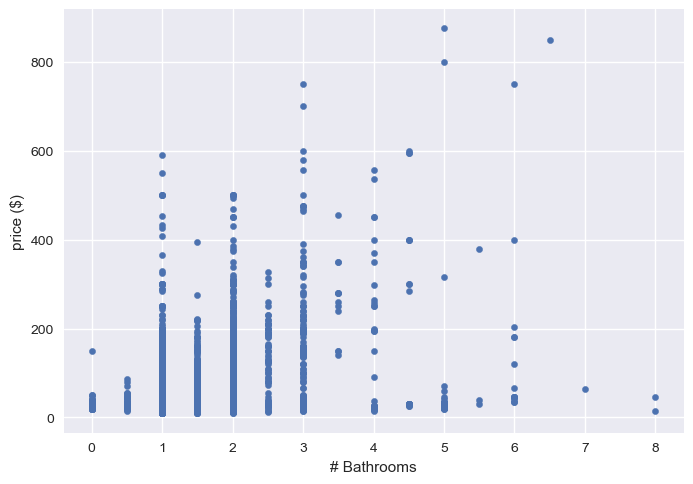

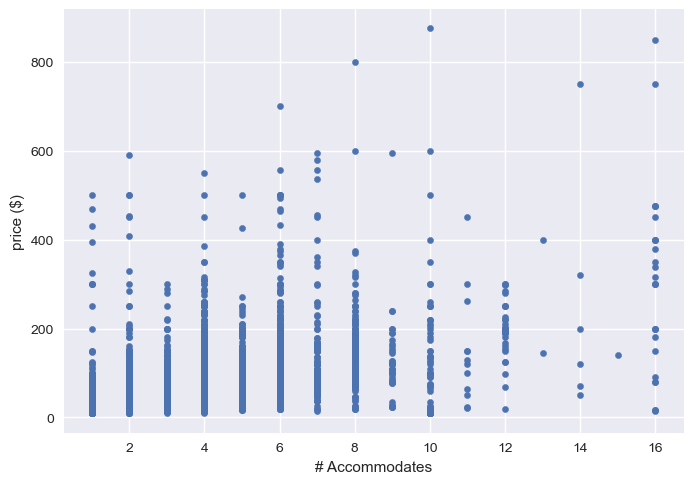

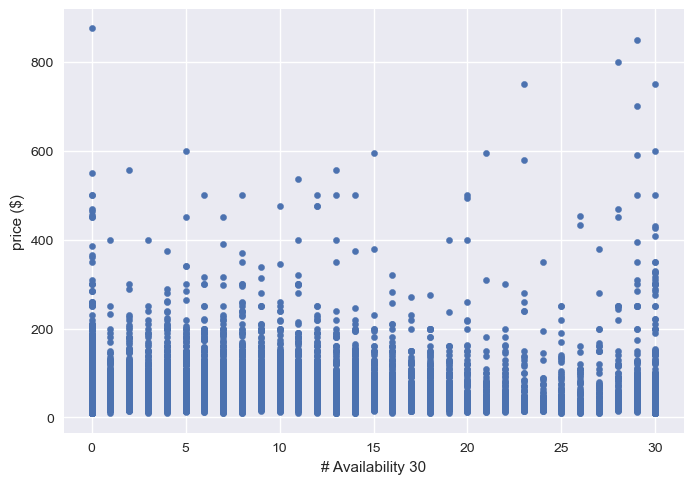

In [33]:
# 2.8.2 - Gráficas del precio en función de las principales características

# Sólo representamos 3: bedrooms, sqm meters y bathrooms
# el resto se puede repetir una a una

airbnb_Madrid_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

airbnb_Madrid_train.plot(kind = 'scatter',x='Square Meters',y = 'Price')
plt.xlabel('Square Meters ($m^2$)')
plt.ylabel('price ($)')
plt.show()

airbnb_Madrid_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('price ($)')
plt.show()

airbnb_Madrid_train.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('price ($)')
plt.show()

airbnb_Madrid_train.plot(kind = 'scatter',x='Availability 30',y = 'Price')
plt.xlabel('# Availability 30')
plt.ylabel('price ($)')
plt.show()

In [35]:
# 2.8.3 - Eliminación de Outliers

# Según estas gráficas no hay Outliers muy marcados, pero eliminamos algunos que parecen serlo. 

airbnb_Madrid_train = airbnb_Madrid_train[airbnb_Madrid_train ['Bedrooms'] < 8 ] 
airbnb_Madrid_train = airbnb_Madrid_train[airbnb_Madrid_train ['Bathrooms'] < 7 ] 
airbnb_Madrid_train = airbnb_Madrid_train[airbnb_Madrid_train ['Square Meters'] > 0 ] 


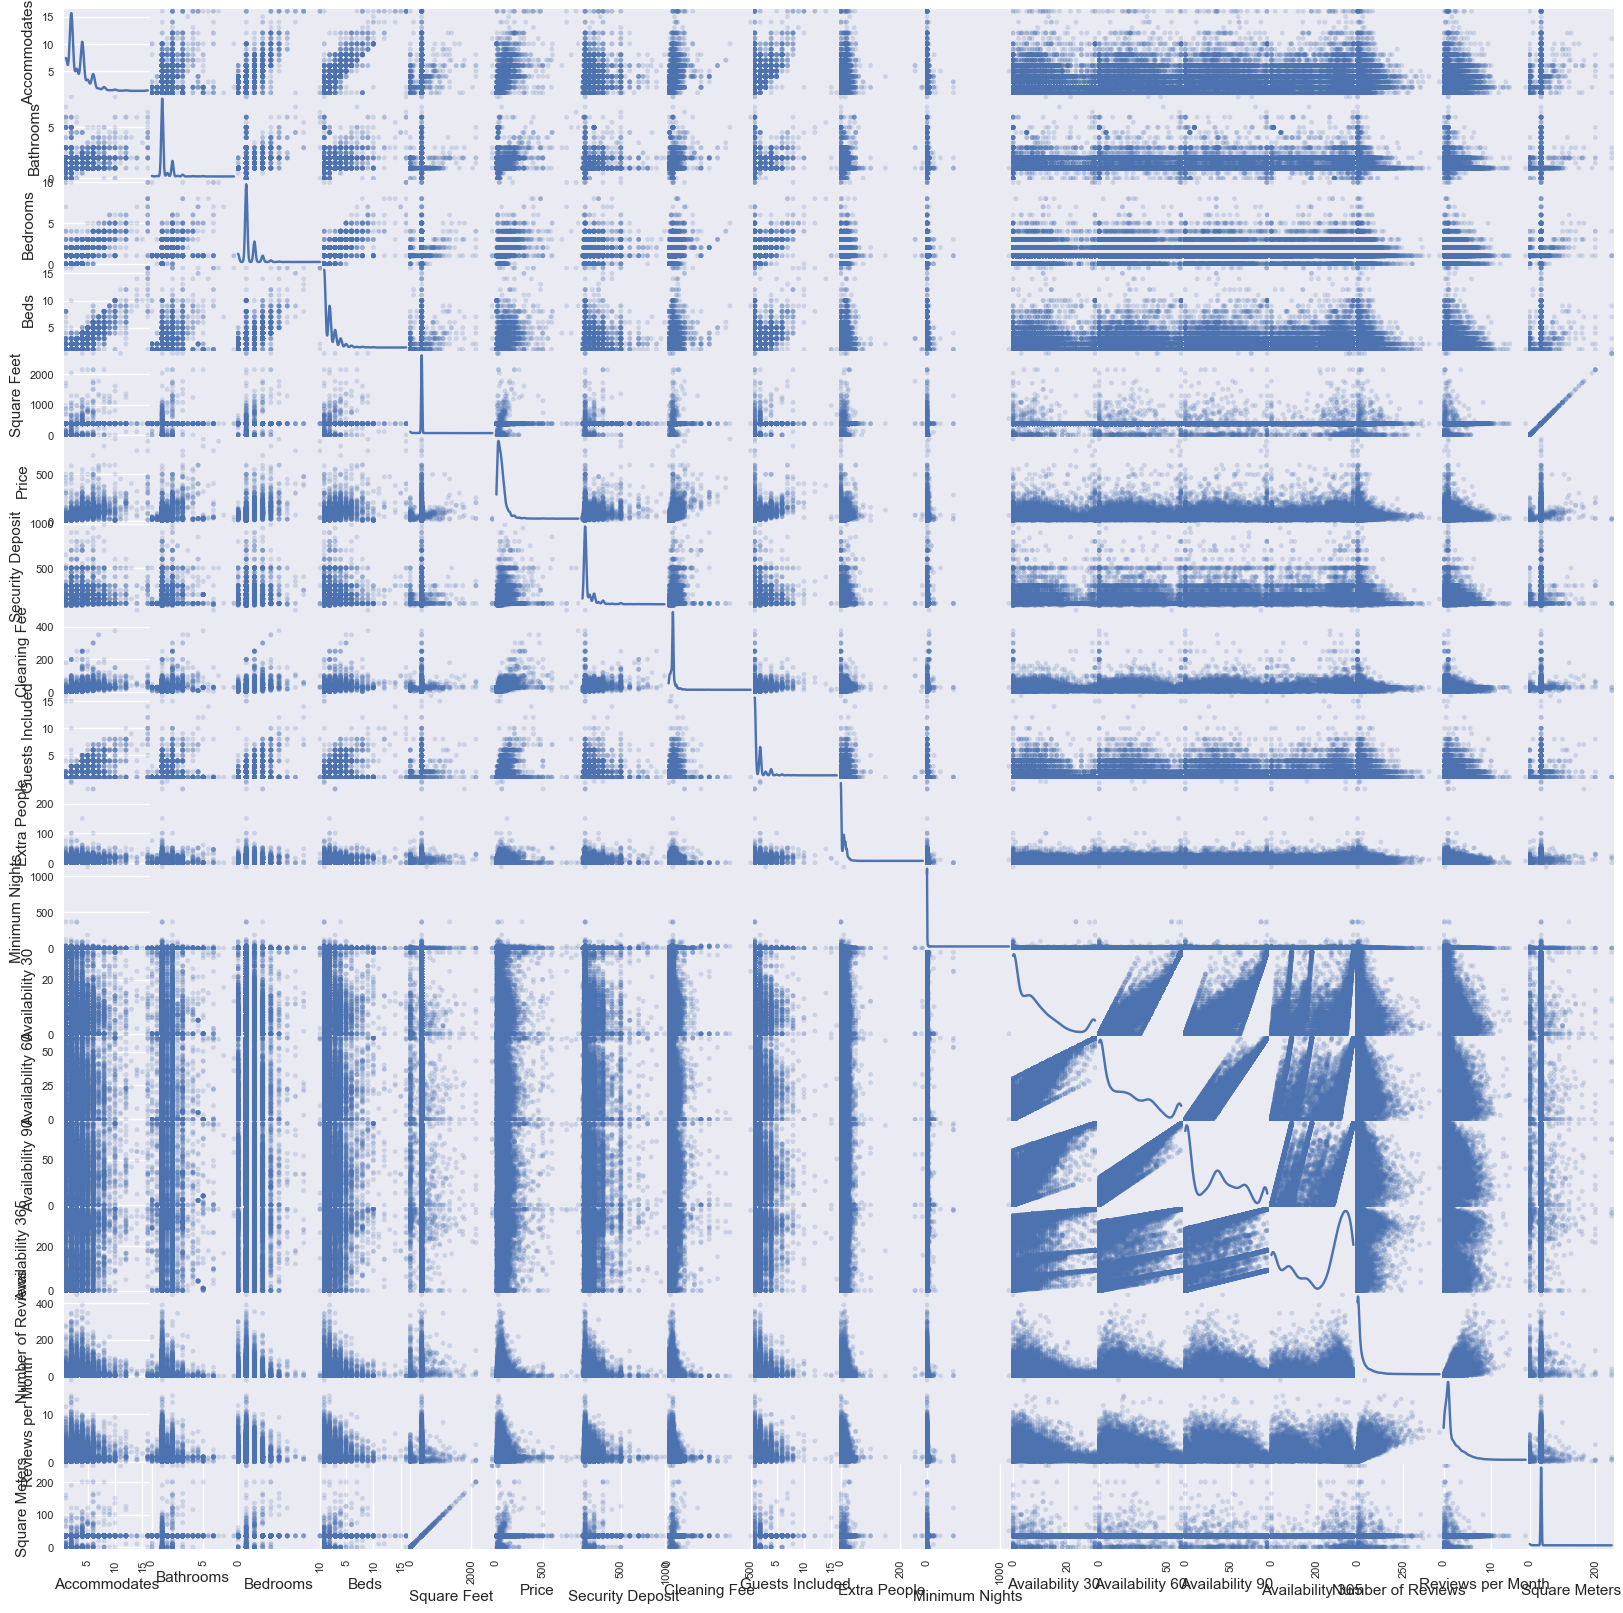

In [39]:
# 2.9 - Representación de todas las variables

pd.plotting.scatter_matrix(airbnb_Madrid_train_corr, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [ ]:
# 3 - Preprocesado

# Ahora vamos a estudiar la selección Random Forest / Lasso

In [40]:
# 3.1 - Se cogen los datos de test y se aplican los resultados del análisis hecho en train

airbnb_Madrid_test = pd.read_csv('./airbnb_Madrid_test.csv', sep=';', decimal='.')

# Conversión de square feet en square meters

def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

airbnb_Madrid_test['Square Meters'] = sqft_to_m2(airbnb_Madrid_test['Square Feet'])

# Solucionar isnull
airbnb_Madrid_test['Neighbourhood'].fillna('0', inplace=True)
airbnb_Madrid_test['Zipcode'].fillna('0', inplace=True)
airbnb_Madrid_test['Bathrooms'].fillna(airbnb_Madrid_test['Bathrooms'].mode()[0], inplace=True)
airbnb_Madrid_test['Bedrooms'].fillna(airbnb_Madrid_test['Bedrooms'].mode()[0], inplace=True)
airbnb_Madrid_test['Beds'].fillna(airbnb_Madrid_test['Beds'].mode()[0], inplace=True)
airbnb_Madrid_test['Amenities'].fillna('0', inplace=True)
airbnb_Madrid_test['Square Feet'].fillna(airbnb_Madrid_test['Square Feet'].mean(), inplace=True)
airbnb_Madrid_test['Price'].fillna(airbnb_Madrid_test['Price'].mean(), inplace=True)
airbnb_Madrid_test['Security Deposit'].fillna(airbnb_Madrid_test['Security Deposit'].mode()[0], inplace=True)
airbnb_Madrid_test['Cleaning Fee'].fillna(airbnb_Madrid_test['Cleaning Fee'].mode()[0], inplace=True)
airbnb_Madrid_test['Reviews per Month'].fillna(airbnb_Madrid_test['Reviews per Month'].mode()[0], inplace=True)
airbnb_Madrid_test['Review Scores Location'].fillna('0', inplace=True)
airbnb_Madrid_test['Square Meters'].fillna(airbnb_Madrid_test['Square Meters'].mean(), inplace=True)
airbnb_Madrid_test.isnull().any()


# Añadir una label al room type: 1-Entire home 2- Private room 3- Shared room

airbnb_Madrid_test['label_tipo'] = airbnb_Madrid_test['Room Type'].apply(lambda x: '1' if x == 'Entire home/apt' else ('2' if x == 'Private room' else '3' if x == 'Shared room' else '4'))

# Añadir una label a la cancelation policy
airbnb_Madrid_test['label_CancellationPolicy'] = airbnb_Madrid_test['Cancellation Policy'].apply(lambda x: '1' if x == 'flexible' else ('2' if x == 'flexible_new' else ('3' if x == 'moderate' else ('4' if x == 'moderate_new' else ('5' if x == 'strict' else ('6' if x == 'strict_new' else ('7' if x == 'super_strict_30' else ('8' if x == 'super_strict_60' else '9'))))))))




C:\Users\usuario\AppData\Local\Temp\ipykernel_28828\2149323048.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_Madrid_test['Neighbourhood'].fillna('0', inplace=True)
C:\Users\usuario\AppData\Local\Temp\ipykernel_28828\2149323048.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [43]:

# Drop de los datos no correlacionables

airbnb_Madrid_test_corr = airbnb_Madrid_test.drop (['Street', 'Neighbourhood', 'City', 'Zipcode', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy'], axis=1)  
#airbnb_Madrid_train_corr.corr()



# Segmentación de los datos separando variable dependiente de las independientes

X_train = airbnb_Madrid_train_corr.drop(columns=['Price']) 
y_train = airbnb_Madrid_train_corr.Price
X_test = airbnb_Madrid_test_corr.drop(columns=['Price']) 
y_test = airbnb_Madrid_test_corr.Price

print(X_train.isna().sum()) 

Accommodates                0
Bathrooms                   0
Bedrooms                    0
Beds                        0
Square Feet                 0
Security Deposit            0
Cleaning Fee                0
Guests Included             0
Extra People                0
Minimum Nights              0
Availability 30             0
Availability 60             0
Availability 90             0
Availability 365            0
Number of Reviews           0
Review Scores Location      0
Reviews per Month           0
Square Meters               0
label_tipo                  0
label_CancellationPolicy    0
dtype: int64


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=2; total time=   0.7s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.9s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=4; total time=   0.5s
[CV] END ........................................max_depth=4; total time=   0.5s
[CV] END .......................................

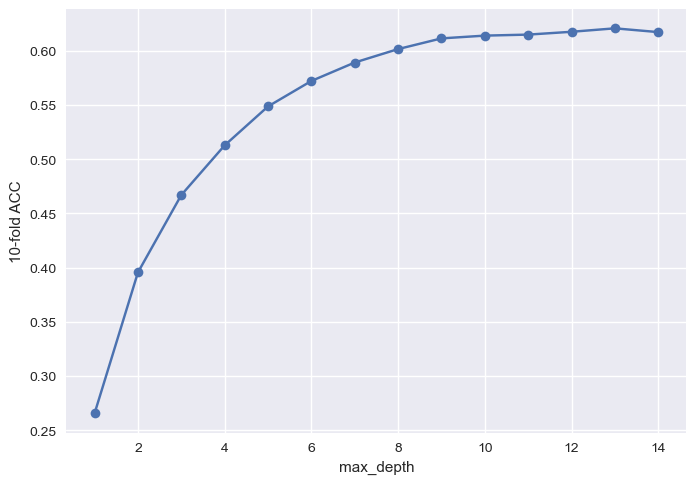

In [45]:
# 3.2 - Aplicación de Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
#print(y_train.isna().sum()) 

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [ ]:
# Vemos que el modelo no es bueno, porque sale un valor de R2 de 0,621 pero ha mejorado respecto las iteraciones anteriores.

In [47]:
# 3.2.5 - Conversión de variables para que las gráficas salgan bien

X_train['label_tipo'] = X_train['label_tipo'].astype(float)
X_train['label_CancellationPolicy'] = X_train['label_CancellationPolicy'].astype(float)
X_train['Review Scores Location'] = X_train['Review Scores Location'].astype(float)
X_test['label_tipo'] = X_test['label_tipo'].astype(float)
X_test['label_CancellationPolicy'] = X_test['label_CancellationPolicy'].astype(float)
X_test['Review Scores Location'] = X_test['Review Scores Location'].astype(float)
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Accommodates              10565 non-null  int64  
 1   Bathrooms                 10565 non-null  float64
 2   Bedrooms                  10565 non-null  float64
 3   Beds                      10565 non-null  float64
 4   Square Feet               10565 non-null  float64
 5   Security Deposit          10565 non-null  float64
 6   Cleaning Fee              10565 non-null  float64
 7   Guests Included           10565 non-null  int64  
 8   Extra People              10565 non-null  int64  
 9   Minimum Nights            10565 non-null  int64  
 10  Availability 30           10565 non-null  int64  
 11  Availability 60           10565 non-null  int64  
 12  Availability 90           10565 non-null  int64  
 13  Availability 365          10565 non-null  int64  
 14  Number

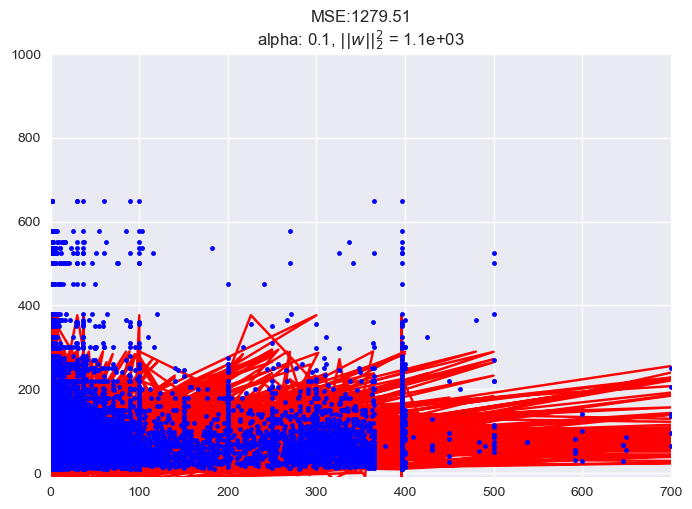

NameError: name 'degree' is not defined

In [59]:
# 3.2 - Aplicación de Lasso

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


#model
#degree = 5
alpha = 0.1
lasso = Lasso(alpha = alpha).fit(X_train,y_train)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
# predicción
y_hat = lasso.predict(X_test)

# error
error_test = np.mean(np.power(y_test - y_hat,2)) 


# Definición de variables
x = X_test  # First feature in the test set (if it's univariate)
y_i = y_test  # Actual target values for the test set
#y_hat = model.predict(X_test)  # Predictions from the model for the test set

# g_x can be defined similarly if you are plotting model predictions
#g_x = lasso.predict(x.reshape(-1, 1))  # Model prediction on the test data
g_x = lasso.predict(x)  # Model prediction on the test data

plt.plot(x, g_x, 'r', label='$y$')  # Model's Lasso predicted values
plt.plot(x, y_i, 'b.', label='$y_i$')  # Actual test values
#plt.plot(x, y_hat, 'g', label='$\hat{y}$')  # Predicted y-values
#plt.title(f'Grado: {degree}, MSE:{error_test:.2f}\nalpha: {alpha:g}, $||w||_2^2$ = {norm_w2:.2g}')
plt.title(f'MSE:{error_test:.2f}\nalpha: {alpha:g}, $||w||_2^2$ = {norm_w2:.2g}')
#print(f'MSE:{error_test:.2f}\nalpha: {alpha:g}, $||w||_2^2$ = {norm_w2:.2g}')
#plt.legend()
plt.xlim((0, 700))
plt.ylim((-10, 1000))
plt.show()

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]

for f,wi in zip(coef_names,w):
  print(f,wi)
  

In [61]:
# 3.2 - Aplicación de Lasso (de Chat GPT)

# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


# Crear un modelo Lasso
lasso_model = Lasso(alpha=0.1)  # 'alpha' es el parámetro de regularización (hiperparámetro)

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE) en el conjunto de prueba: {mse:.4f}")

# Ver los coeficientes de las características
print("Coeficientes del modelo Lasso:", lasso_model.coef_)

# Ver las características seleccionadas (coeficientes diferentes de cero)
selected_features = X_test.columns[lasso_model.coef_ != 0]
print("Características seleccionadas por el modelo Lasso:", selected_features)

Error cuadrático medio (MSE) en el conjunto de prueba: 1279.5129
Coeficientes del modelo Lasso: [ 6.00200880e+00  1.27719167e+01  9.62827609e+00 -2.42605604e-02
  2.65854823e-04  3.45875889e-02  8.24153176e-01  2.07954297e+00
 -2.28263272e-01 -3.97729442e-02  6.28251414e-01  2.12874906e-01
 -1.53339859e-01  2.90909855e-03 -1.58748729e-02 -6.98218700e-01
 -6.00042128e-01  0.00000000e+00 -2.90045953e+01 -7.37246240e-01]
Características seleccionadas por el modelo Lasso: Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Location', 'Reviews per Month', 'label_tipo',
       'label_CancellationPolicy'],
      dtype='object')


In [ ]:
# El valor de MSE de Lasso da lo mismo en los dos casos. 

(10565, 20)
(10565,)
(2642, 20)
(2642,)


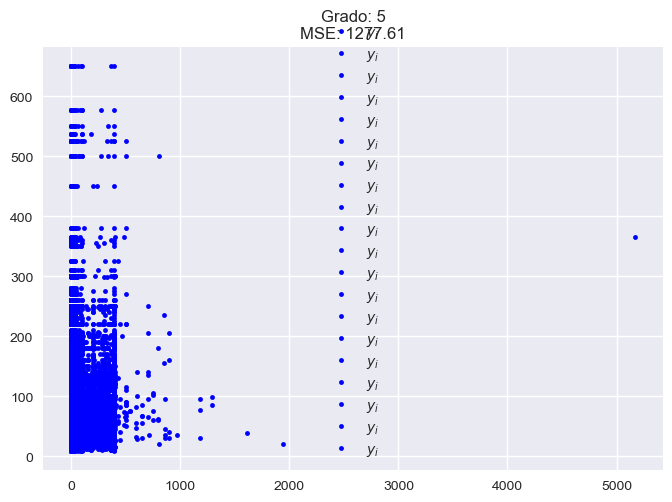

w0:  33.47812011635114
w1:  6.031444174296624
w2:  13.18847238098674
w3:  9.883070536683588
w4:  -0.29884746160003245
w5:  0.00019524235015222564

||w||_2^2 = 1.2e+03


In [63]:
# 3.3 - Aplicación de un modelo base de regresión lineal con las variables, escojo m2, bedrooms, Accomodates, Bathrooms, Cleaning Fee, minimum nights
# para comparar el error MSE

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

degree = 5

# features
poly = PolynomialFeatures(degree) # generamos x^j
#X_train_RL = X_train.drop(columns=['Security Deposit', 'Guests Included', 'Extra People', 'Number of Reviews', 'Reviews per Month'])
X_train_RL = X_train

y_train_RL = y_train

#X_test_RL = X_test.drop(columns=['Security Deposit', 'Guests Included', 'Extra People', 'Number of Reviews', 'Reviews per Month'])
X_test_RL = X_test

y_test_RL = y_test

# Pintar dimensiones de los 4
print(X_train_RL.shape)
print(y_train_RL.shape)
print(X_test_RL.shape)
print(y_test_RL.shape)


# pista: como siempre, instanciar el modelo y .fit()
lr = LinearRegression().fit(X_train_RL, y_train_RL)

# predicción
y_hat = lr.predict(X_test_RL)

# Cálculo del error
mse = np.mean((y_test_RL-y_hat)**2)

# Identificación de variables
x = X_train_RL
g_x = y_train_RL
x_i = X_test_RL
y_i = y_test_RL

# Representación gráfica

#plt.plot(x,g_x,'r',label='$y$')
plt.plot(x_i,y_i,'b.',label='$y_i$')
#plt.plot(x_i,y_hat,'g',label='$\hat{y}$')
plt.title(f'Grado: {degree}\nMSE: {mse:.2f}')
plt.legend()
#plt.xlim((0, 1))
#plt.ylim((-2, 2))
plt.show()

# Mostramos los coeficientes del modelo
print('w0: ', lr.intercept_)

w = lr.coef_
norm_w2 = np.dot(w,w.T) # no se tiene en cuenta el intercepto

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]
for f,wi in zip(coef_names,w):
    print(f,wi)

print(f'\n||w||_2^2 = {norm_w2:.2g}')





In [69]:
# 4 - Aplicación de cross-validation manualmente con Random Forest

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

# Crear el objeto KFold
kf = KFold(n_splits=5)

# Definir el modelo
model = RandomForestRegressor()

# Iterar sobre los splits y entrenar/validar el modelo
scores = []
for train_index, test_index in kf.split(X_train):
    
    X_train_CV, X_test_CV = X_train.iloc[train_index], X_train.iloc[test_index]  # Dividimos solo X_train
    y_train_CV, y_test_CV = y_train.iloc[train_index], y_train.iloc[test_index]  # Lo mismo para y_train

    # Entrenar el modelo
    model.fit(X_train_CV, y_train_CV)
    
    # Evaluar el modelo
    score = model.score(X_test_CV, y_test_CV)
    scores.append(score)

print("Scores de cada fold: ", scores)
print("Promedio de la validación cruzada: ", sum(scores)/len(scores))

Scores de cada fold:  [0.6289866792704527, 0.6067959371833611, 0.574205096664866, 0.5919220002019299, 0.5913792947658595]
Promedio de la validación cruzada:  0.5986578016172939


In [ ]:
# Vemos que sale un resutado parecido a sin Cross Validation

In [125]:
# 4.1 Probaremos con Ridge

# Importar las librerías necesarias
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de Ridge Regression
ridge_model = Ridge(alpha=1.0)  # 'alpha' es el parámetro de regularización

# Entrenar el modelo con los datos de entrenamiento
ridge_model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Evaluar el modelo: calcular el R^2 (coeficiente de determinación) y el MSE (error cuadrático medio)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Mostrar los resultados
print("R^2 del modelo Ridge:", r2)
print("Error cuadrático medio (MSE):", mse)

R^2 del modelo Ridge: 0.5715505122710764
Error cuadrático medio (MSE): 1277.6205741743465


In [127]:
# 4.2 Y ahora Cross Validation para el modelo de Ridge


from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Crear el objeto KFold
kf = KFold(n_splits=5)

# Definir el modelo
model = Ridge(alpha=1.0)

# Iterar sobre los splits y entrenar/validar el modelo
scores = []
for train_index, test_index in kf.split(X_train):
    
    X_train_CV, X_test_CV = X_train.iloc[train_index], X_train.iloc[test_index]  # Dividimos solo X_train
    y_train_CV, y_test_CV = y_train.iloc[train_index], y_train.iloc[test_index]  # Lo mismo para y_train

    # Entrenar el modelo
    model.fit(X_train_CV, y_train_CV)
    
    # Evaluar el modelo
    score = model.score(X_test_CV, y_test_CV)
    scores.append(score)

print("Scores de cada fold: ", scores)
print("Promedio de la validación cruzada: ", sum(scores)/len(scores))


Scores de cada fold:  [0.5528058642427406, 0.5585841465982231, 0.5461428703776803, 0.5237170907105801, 0.5071388978474891]
Promedio de la validación cruzada:  0.5376777739553427


In [ ]:
# Los resultados son peores para Ridge que para Random Forest y también empeoran cuando se utiliza Cross Validation, con los dos modelos